# Notebook for stepping through training

In [14]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time


In [4]:
DATA_DIR = "/Users/davidsewell/MLData/JaneStreet"
PROJ_DIR = "/Users/davidsewell/Github/JaneStreetComp"
os.chdir(PROJ_DIR)

In [5]:
from src.bandits import SimpleKMeansBandit
from src.trainer import BanditTrainer, TrainEnv
from src.data import JaneData

## Prepare the data

In [29]:
TOP_N = 10 # PCA Components to keep
K = 20 # Number of clusters
THRESHOLD = 0 # threshold for bandit agent. States with percieved UCB value > threshold get "pulled"
EPS = 0.1 # Epsilon for epsilon greedy

In [10]:
jane_data = JaneData(DATA_DIR)

n = len(jane_data.train_df)

n_train = int(n*0.9)

train , test = jane_data.train_df.iloc[:n_train,:] , jane_data.train_df.iloc[n_train:,:]

train_env = TrainEnv(train)

test_env = TrainEnv(test)

train_features = jane_data.extract_features(train)

pca = jane_data.run_pca(train_features,TOP_N)

X = jane_data.create_transformed(pca,train_features,TOP_N)


Done Loading Jane Data
Using seed data None
Running PCA
Data shape (90000, 130)


In [30]:
kmeans = jane_data.run_kmean(K,X)

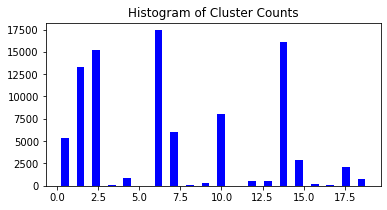

In [31]:
jane_data.display_histogram(kmeans.labels_,n_bins=K)

In [32]:
train["labels"] = kmeans.labels_

def calc_return(x):
    return np.dot(x["weight"],x["resp"])
    
always_c = train.groupby("labels").apply(lambda x: calc_return(x))
oracle_c = train[train["resp"] > 0].groupby("labels").apply(lambda x: calc_return(x))
    

<ipython-input-32-c604e3aafcde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["labels"] = kmeans.labels_


<AxesSubplot:xlabel='labels'>

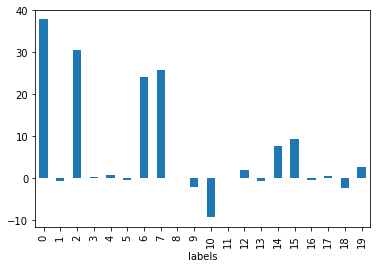

In [33]:
always_c.plot(kind="bar")

<AxesSubplot:xlabel='labels'>

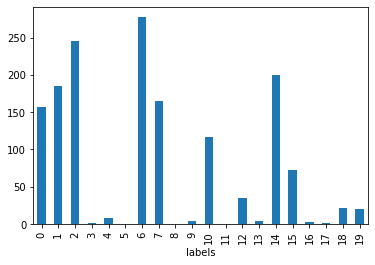

In [34]:
oracle_c.plot(kind="bar")

In [ ]:
def ground_truth_cluster_values(train_data,labels):
    """
    Return cumulative and avg value of each cluster
    assuming we acted perfectly. i.e always take trade when result will > 0
    """
    train_data["labels"] = labels
    
    train_data[""]
    
    

In [ ]:
jane_data.display_histogram(kmeans.labels_,n_bins=K)

def transform(x):
    features = [f"feature_{i}" for i in range(130)]
    x = x.fillna(0)
    x = x[features].to_numpy().reshape((1,len(features)))
    x = pca.transform(x)
    return x

agent = SimpleKMeansBandit(K,kmeans,transform,threshold=THRESHOLD,eps=EPS)

trainer = BanditTrainer(agent,test_env,train_env)

train_r , test_r = trainer.train(iters=10)
x_axis = [x for x in range(len(train_r))]
plt.plot(x_axis,train_r,label="train")
plt.legend()
plt.show()

plt.plot(x_axis, test_r, label="test")
plt.legend()
plt.show()